<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание-&quot;Линейная-алгебра.-Векторы&quot;" data-toc-modified-id="Домашнее-задание-&quot;Линейная-алгебра.-Векторы&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее задание "Линейная алгебра. Векторы"</a></span></li><li><span><a href="#Домашнее-задание-&quot;Линейная-алгебра.-Матрицы&quot;" data-toc-modified-id="Домашнее-задание-&quot;Линейная-алгебра.-Матрицы&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Домашнее задание "Линейная алгебра. Матрицы"</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Задание 2</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Домашнее задание "Линейная алгебра. Векторы"

In [2]:
v = np.array([[1, 1], [2, 0], [0, 2]])

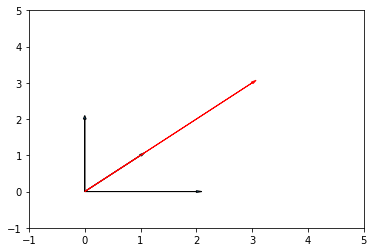

In [3]:
ax = plt.axes()
ax.arrow(0, 0, *v[0], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *v[1], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *v[2], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *(v[0]+v[1]+v[2]), head_width=0.05, head_length=0.1, color = 'r' )
plt.ylim(-1,5)
plt.xlim(-1,5)
plt.show()

In [4]:
def angle(v1, v2, acute):
    angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if (acute == True):
        return angle
    else:
        return 2 * np.pi - angle

In [5]:
ang = angle(v[0], v[1], True)
print(f"{round(ang, 3)} rad, {round(ang*(180/np.pi), 3)} deg")

0.785 rad, 45.0 deg


## Домашнее задание "Линейная алгебра. Матрицы"

### Задание 1

In [6]:
m = np.arange(1,10).reshape(3,3)
u = np.eye(3)
m + u

array([[ 2.,  2.,  3.],
       [ 4.,  6.,  6.],
       [ 7.,  8., 10.]])

In [7]:
v = np.arange(1,4)
v

array([1, 2, 3])

In [8]:
# в задании не сказано, левое или правое умножение, так что можно и так и так

print(v.dot(m + u), (m + u).dot(v))

[31. 38. 45.] [15. 34. 53.]


In [9]:
from numpy import linalg

# В задании сказано инвертировать результат умножения матрицы на вектор, 
# но это технически невозможно, так как обратные матрицы определены только 
# для квадратных. Так что инвертируем то, что можно

linalg.inv(m + u)

array([[-6. , -2. ,  3. ],
       [-1. ,  0.5,  0. ],
       [ 5. ,  1. , -2. ]])

### Задание 2

(-200.0, 200.0)

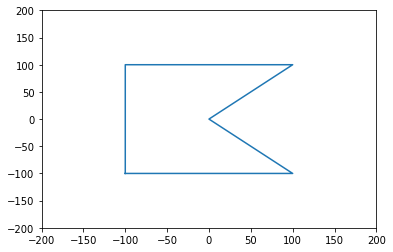

In [10]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

* Уменьшить объект в два раза
* Повернуть на 130 градусов
* Отразить объект относительно прямой y=x
* Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)


У нас имеется 6 векторов в двумерных однородных координатах, объединенных в массив А. Для того, что бы произвести с массивом операцию трансформации, необходимо произвести ее с каждым вектором.

In [36]:
# Изменение размера 

def figure_scale(A, a, b):
    scale_matrix = np.array([[a, 0, 0], [0, b, 0], [0, 0, 1]])
    A_scale = []
    for i in range(0, len(A)):
        A_transform = scale_matrix.dot(A[i])
        A_scale.append(A_transform)
    return A_scale

(-200.0, 200.0)

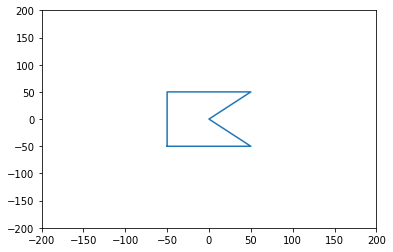

In [37]:
a = 1/2
b = 1/2

x_scale = np.array(figure_scale(A, a, b))[:,0]
y_scale = np.array(figure_scale(A, a, b))[:,1]  
plt.plot(x_scale, y_scale)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [38]:
# Поворот 
# В задании не указано - по часовой стрелке или против, так что сделал оба

def figure_rotate(A, deg_angle, clockwise):
    cos_angle = round(math.cos(deg_angle*np.pi/180), 5)
    sin_angle = round(math.sin(deg_angle*np.pi/180), 5)
    if clockwise == True:
        rotate_matrix = np.array([[sin_angle, cos_angle, 0], [cos_angle, -sin_angle, 0], [0, 0, 1]])
    else:
        rotate_matrix = np.array([[cos_angle, -sin_angle, 0], [sin_angle, cos_angle, 0], [0, 0, 1]])
    A_rotate = []
    for i in range(0, len(A)):
        A_transform = rotate_matrix.dot(A[i])
        A_rotate.append(A_transform)
    return A_rotate

(-200.0, 200.0)

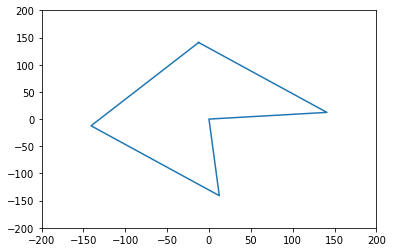

In [39]:
deg_angle = 130

x_rotate = np.array(figure_rotate(A, deg_angle, True))[:,0]
y_rotate = np.array(figure_rotate(A, deg_angle, True))[:,1]  
plt.plot(x_rotate, y_rotate)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Немного кривовато вышло, не очень врубился, почему

In [40]:
# Отражение относительно осей

def figure_reflect(A, axis):
    if axis == 'x':
        reflect_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflect_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflect_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    A_reflect = []
    for i in range(0, len(A)):
        A_transform = reflect_matrix.dot(A[i])
        A_reflect.append(A_transform)
    return A_reflect

In [41]:
# Сдвиг

def figure_translate(A, X, Y):
    translate_matrix = np.array([[1, 0, X], [0, 1, Y], [0, 0, 1]])
    A_translate = []
    for i in range(0, len(A)):
        A_transform = translate_matrix.dot(A[i])
        A_translate.append(A_transform)
    return A_translate

Но у нас-то отражение относительно y=x, а для такой фигуры это эквивалент поворота на 90 градусов и сдвига насколько я это по0быстрому представил)

(-200.0, 300.0)

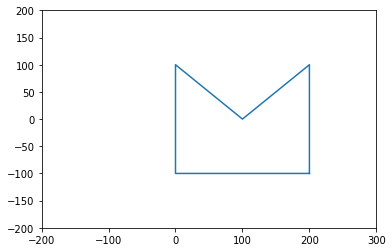

In [45]:
deg_angle = 90
X = 100
Y = 0

x_reflect = np.array(figure_translate(figure_rotate(A, deg_angle, False), X, Y))[:,0]
y_reflect = np.array(figure_translate(figure_rotate(A, deg_angle, False), X, Y))[:,1]  
plt.plot(x_reflect, y_reflect)
plt.ylim([-200, 200])
plt.xlim([-200, 300])

И последнее

(-200.0, 400.0)

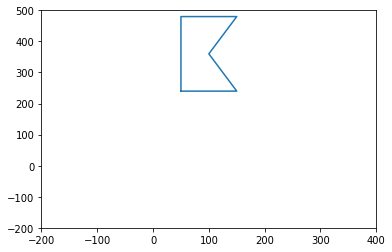

In [47]:
a = 0.5
b = 1.2

X = 200
Y = 300

x_comp = np.array(figure_scale(figure_translate(A, X, Y), a, b))[:,0]
y_comp = np.array(figure_scale(figure_translate(A, X, Y), a, b))[:,1]  
plt.plot(x_comp, y_comp)
plt.ylim([-200, 500])
plt.xlim([-200, 400])